# Playing with integration layer

When the command `docker-compose up builder` finishes its execution, you'll find the following files in this folder:

- character.parquet
- dialogue.parquet
- episode.parquet
- scene.parquet

We can use them to analyze all the data and answer some questions, such as which character has more lines?

## Converting parquet to pandas dataframe

Giving you have executed the command mentioned above, now we can create the DataFrames from the parquet files:

In [1]:
import pandas as pd

dialogue_df = pd.read_parquet("dialogue.parquet")
episode_df = pd.read_parquet(f"episode.parquet")
dialogue_df = pd.read_parquet(f"dialogue.parquet")
character_df = pd.read_parquet(f"character.parquet")
scene_df = pd.read_parquet(f"scene.parquet")

Now that we have all DFs, let's see the main characters:

In [2]:
character_df.query("IS_MAIN == True")

,NAME,IS_MAIN
0,ROSS,True
1,MONICA,True
2,PHOEBE,True
3,RACHEL,True
4,CHANDLER,True
5,JOEY,True


How about which is the character that has more lines on the show? 📣

<AxesSubplot:xlabel='CHARACTER_NAME'>

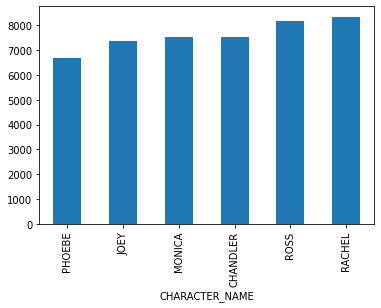

In [19]:
friends = ["CHANDLER", "JOEY", "MONICA", "PHOEBE", "RACHEL", "ROSS"]
dialogue_df_only_with_main_characters = dialogue_df.loc[dialogue_df['CHARACTER_NAME'].isin(friends)]

final_df = dialogue_df_only_with_main_characters.groupby(["CHARACTER_NAME"])["SEASON_NUMBER"].count().sort_values()
final_df.plot(kind="bar", x="CHARACTER_NAME")